In [2]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
X = train_data.drop(['label'],axis=1).values
Y = train_data['label'].values

In [4]:
X = X/X.max()

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [6]:
#Step 2
#Define neural network
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras.utils import to_categorical

In [7]:
from livelossplot import PlotLossesKeras
plot_losses = PlotLossesKeras()

In [8]:
ytrain = to_categorical(ytrain)

In [9]:
ytest = to_categorical(ytest)

In [10]:
xtrain.shape[1]

784

In [11]:
#build the neural network
model = models.Sequential()
model.add(layers.Dense(300, activation='relu', input_dim = xtrain.shape[1]))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(200, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
#Step 3
#Configure your learning process
from keras import optimizers
from keras import metrics

model.compile(optimizer='sgd',
             loss = 'categorical_crossentropy',
             metrics=['accuracy'])

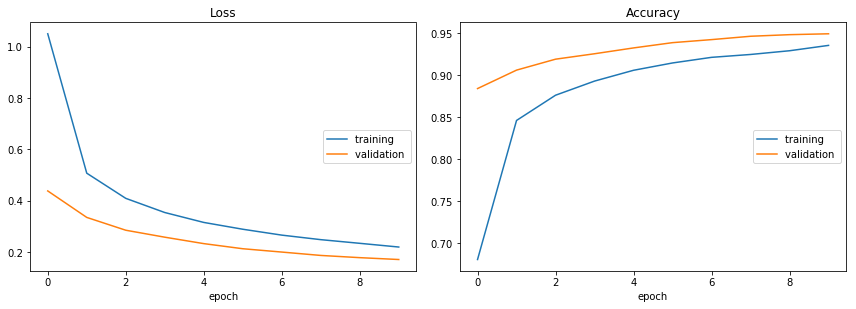

Loss
	training         	 (min:    0.219, max:    1.050, cur:    0.219)
	validation       	 (min:    0.171, max:    0.438, cur:    0.171)
Accuracy
	training         	 (min:    0.680, max:    0.936, cur:    0.936)
	validation       	 (min:    0.884, max:    0.949, cur:    0.949)


In [13]:
#step 4
#Trrain the model
model.fit(xtrain,ytrain,epochs=10,
          callbacks = [plot_losses],
          validation_data = (xtest,ytest))

In [14]:
xtrain[50]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [15]:
xtrain.shape

(31500, 784)

In [16]:
import numpy as np
np.argmax(model.predict(xtest[589].reshape(1,784)))

9

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


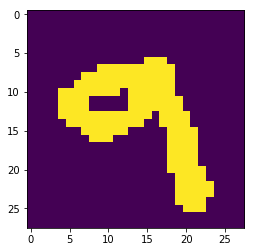

In [17]:
print(ytest[589])
import matplotlib.pyplot as plt
plt.imshow(xtest[589].reshape(28,28))
plt.show()

In [18]:
test_data = test_data.values

In [19]:
test_data_pred = model.predict(test_data)

In [20]:
np.argmax(test_data_pred[285])

3

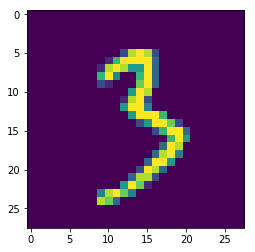

In [21]:
plt.imshow(test_data[285].reshape(28,28))
plt.show()